In [5]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
import numpy as np

[[ 6.21055936e+00  1.65471923e+00  1.00000000e+00]
 [ 8.17931217e+00  1.38400962e+00  1.00000000e+00]
 [ 8.11028148e+00 -4.59172444e-01  1.00000000e+00]
 [ 3.71075802e+00  2.26413385e+00  1.00000000e+00]
 [ 7.71793383e+00  5.86390605e-01  1.00000000e+00]
 [ 7.33009444e+00 -4.92164499e-01  1.00000000e+00]
 [ 4.15666616e+00  1.67963697e+00  1.00000000e+00]
 [ 8.51335951e+00  8.99833306e-01  1.00000000e+00]
 [ 3.19149441e+00  2.28620436e+00  1.00000000e+00]
 [ 2.87466769e+00  2.66968289e+00  1.00000000e+00]
 [ 6.23123724e+00 -3.97418335e-01  1.00000000e+00]
 [ 3.17567862e+00  1.65977351e+00  1.00000000e+00]
 [ 7.20730182e+00 -8.23600137e-01  1.00000000e+00]
 [ 8.03728620e+00 -1.33962054e+00  1.00000000e+00]
 [ 7.73634221e+00  1.35312314e+00  1.00000000e+00]
 [ 5.17701476e+00  3.07646449e+00  1.00000000e+00]
 [ 8.18203445e+00  4.10343187e-01  1.00000000e+00]
 [ 2.68386257e+00  3.37520600e+00  1.00000000e+00]
 [ 2.86543758e+00  3.52442706e+00  1.00000000e+00]
 [ 2.69272466e+00  3.02380113e+

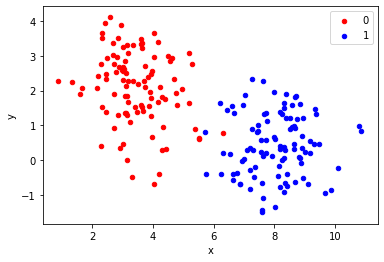

In [6]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2)
one = np.ones((200,1))
X = np.append(X,one, axis=1)
print(X)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [21]:
# def generate_weightmatrix(n):
w_ij = np.random.rand(2,3)#2 inputs * 2 nodes hidden layer
w_ki = np.random.rand(1,3) # 1 output * 2 nodes in previous layer output layer
print(w_ki)

[[0.09439292 0.33951028 0.65265585]]


In [11]:
def calculate_predvalue(input_val, weight):
    weighted_sum = []
    for i in range(len(input_val)):
        temp = np.dot(input_val[i], weight.T)
        weighted_sum.append(temp.tolist())
    return weighted_sum

In [12]:
def sigmoid(z):
    sig = 1/(1+ np.exp(-z))
    return sig

In [40]:
def derivative(z):
    d = z * (1-z)
    return d

In [113]:
max_iter = 1
learning_rate = 0.00001
error = []
for i in range(max_iter):
    print("**************Epoch:",i)
    thresh=[]
    h_j = []
    
    weighted_sum_hiddenlayer = []
    weighted_sum_outputlayer = []
    
    for j in range(len(X)):
        weighted_sum_hiddenlayer = calculate_predvalue(X,w_ij)
#     print(weighted_sum_hiddenlayer)
    for p in weighted_sum_hiddenlayer:
        temp = []
        for q in p:
            temp.append(sigmoid(q))
        h_j.append(temp)
    weightsum_hidden_layer = np.array(h_j) ## Converting the output of hidden layer into an array
    weightsum_hidden_layer = np.append(weightsum_hidden_layer, one, axis = 1)
#     print(weightsum_hidden_layer.shape)
#     break
    for k in range(len(weightsum_hidden_layer)):
        weighted_sum_outputlayer = calculate_predvalue(weightsum_hidden_layer,w_ki) ## Outpt of the final node
#     print(weighted_sum_outputlayer)
    weightsum_output_layer = np.array(weighted_sum_outputlayer) ##Converting the output of final node to an array
#     print(weightsum_output_layer.shape)
#     break
    for el in weighted_sum_outputlayer:
        thresh.append(sigmoid(el[0])) ## Applying the activation function on the output values
    error = y - thresh
#     print(error)
#     break
    print(weightsum_output_layer.shape)
    print(weightsum_hidden_layer.shape)
    break
    d_w = derivative(weightsum_output_layer)
    d_wj = derivative(weightsum_hidden_layer)
    #error=np.array(error)
    temp =  []
    for i in range(d_w.shape[0]):
        temp.append(error[i]*d_w[i][0])
    temp=np.array(temp)
    temp1 = []
#     print(temp)
#     break
    delta_w_ki = np.matmul(temp, weightsum_hidden_layer)
#     print(delta_w_ki)
#     delta_wij = np.dot(weightsum_first_layer.T, np.dot(error * derivative(), weightsum_hidden_layer.T) * derivative(weightsum_first_layer))
    delta_wij = delta_w_ki * w_ki * d_wj
#     print(delta_wij)
#     break
#     print(type(delta_wij))
#     print(delta_wij.shape)
#     break;
    w_ij += (delta_wij * learning_rate)
    w_ki += (delta_wki * learning_rate)

**************Epoch: 0
(200, 1)
(200, 3)


In [ ]:
W